In [1]:
base_params = {
    "save_timeseries_data": 1, 
    "alpha_change" : "dynamic_culturally_determined_weights",
    "time_steps_max": 3000,
    "phi_lower": 0.01,
    "phi_upper": 0.05,
    "compression_factor": 10,
    "seed_list": [1,2,3,4,5],
    "set_seed": 1,
    "N": 100,
    "M": 2,
    "K": 10,
    "prob_rewire": 0.1,
    "cultural_inertia": 1000,
    "learning_error_scale": 0.02,
    "discount_factor": 0.95,
    "homophily": 0.95,
    "confirmation_bias": 18,
    "a_attitude": 0.3,
    "b_attitude": 0.3,
    "a_threshold": 1,
    "b_threshold": 1,
    "green_N": 0,
    "a_pU": 1,
    "a_pC": 1,
    "a_pR": 1,
    "b_pU": 1,
    "b_pC": 1,
    "b_pR": 1,
    "a_thresholdspU": 1,
    "a_thresholdspC": 1,
    "a_thresholdspR": 1,
    "b_thresholdspU": 1,
    "b_thresholdspC": 1,
    "b_thresholdspR": 1,
    "Model_Setup": "Thresholds 3" # Values out of: {"default", "Szenario 1", "Szenario 2", "Szenario 3", "Identity_only", "TA_only", "Thresholds 1", "Thresholds 2", "Thresholds 3"},
} 

In [2]:
from package.generating_data import single_experiment_gen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ergebnisse hier sammeln
all_threshold_trajectories = []
all_identity_trajectories = []
all_carbon_trajectories = []

# 100 Läufe mit gleichem base_params
for i in range(100):
    fileName, result = single_experiment_gen.main(
        base_params=base_params,
        return_data=True
    )
    thresholds = result["av_thresholds_list"]  # history_av_thresholds
    identity = result["av_identity_list"]
    carbon_emission = result["av_carbon_emission"]
    all_threshold_trajectories.append(thresholds)
    all_identity_trajectories.append(identity)
    all_carbon_trajectories.append(carbon_emission)

fileName: results/single_experiment_18_14_31__21_07_2025
fileName: results/single_experiment_18_15_07__21_07_2025
fileName: results/single_experiment_18_15_46__21_07_2025
fileName: results/single_experiment_18_16_27__21_07_2025
fileName: results/single_experiment_18_17_09__21_07_2025
fileName: results/single_experiment_18_17_49__21_07_2025
fileName: results/single_experiment_18_18_27__21_07_2025
fileName: results/single_experiment_18_19_02__21_07_2025
fileName: results/single_experiment_18_19_36__21_07_2025
fileName: results/single_experiment_18_20_10__21_07_2025
fileName: results/single_experiment_18_20_43__21_07_2025
fileName: results/single_experiment_18_21_17__21_07_2025
fileName: results/single_experiment_18_21_52__21_07_2025
fileName: results/single_experiment_18_22_31__21_07_2025
fileName: results/single_experiment_18_23_10__21_07_2025
fileName: results/single_experiment_18_23_45__21_07_2025
fileName: results/single_experiment_18_24_22__21_07_2025
fileName: results/single_experi

In [3]:
df = pd.DataFrame(all_threshold_trajectories)
df.to_csv("montecarlo_thresholds.csv", index=False)

C:\Users\jacob\AppData\Local\Temp\ipykernel_18964\3393186011.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(t*10) for t in ticks])
C:\Users\jacob\AppData\Local\Temp\ipykernel_18964\3393186011.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(t*10) for t in ticks])
C:\Users\jacob\AppData\Local\Temp\ipykernel_18964\3393186011.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(t*10) for t in ticks])
C:\Users\jacob\AppData\Local\Temp\ipykernel_18964\3393186011.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(t*10) for t in ticks])
C:\Users\jacob\AppData\Local\Temp\ipykernel_18964\3393186011.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(t*10) for t in ticks])
C:\Users\jacob\AppData\Local\Temp\ipykern

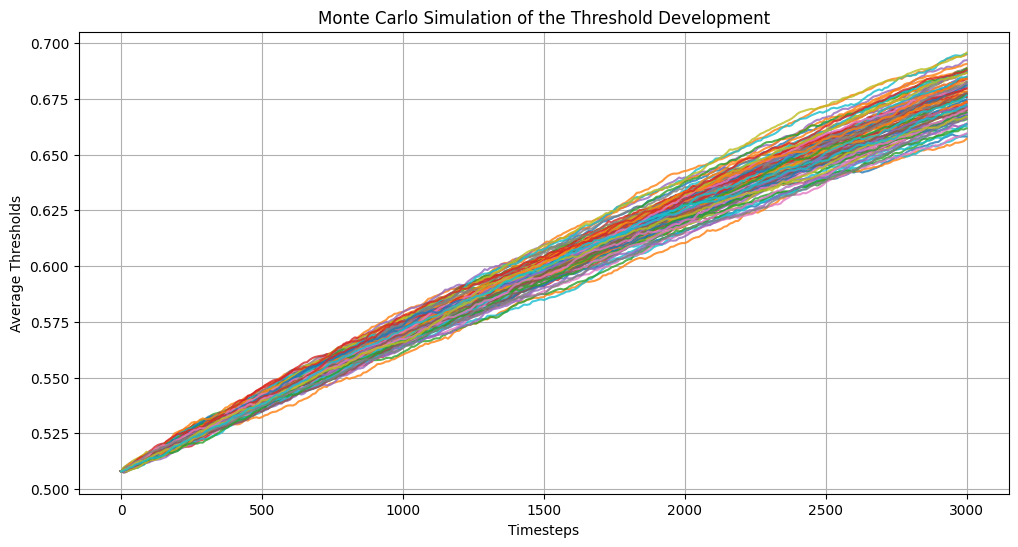

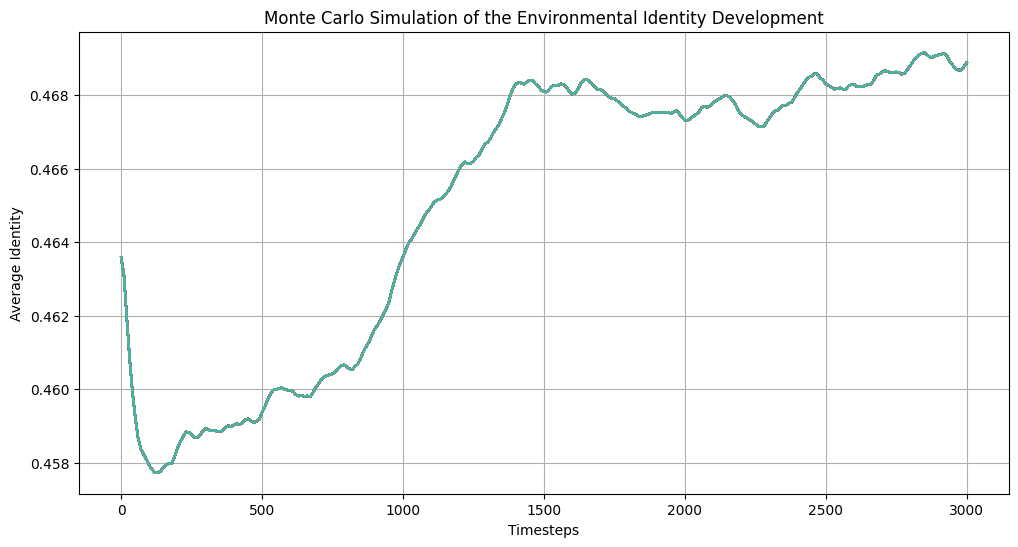

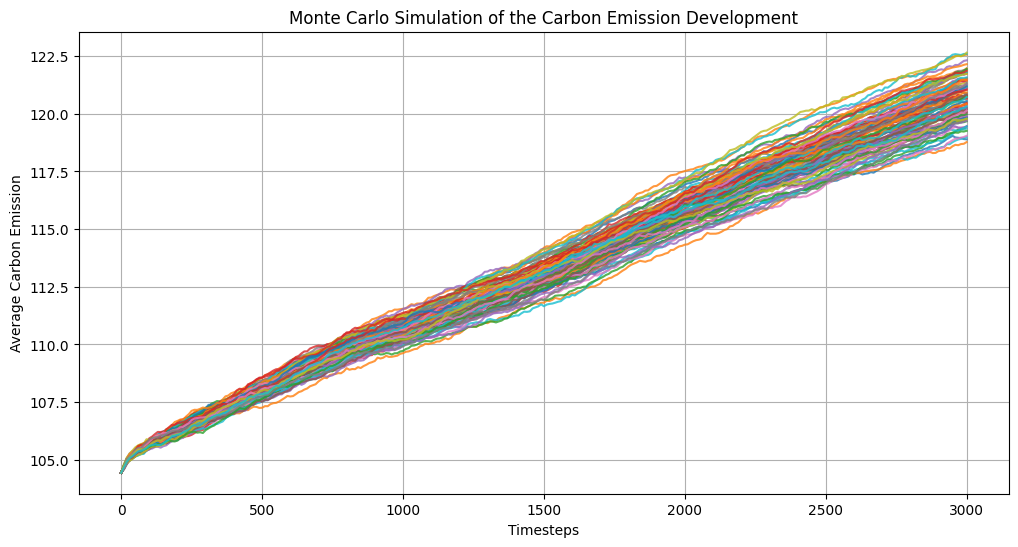

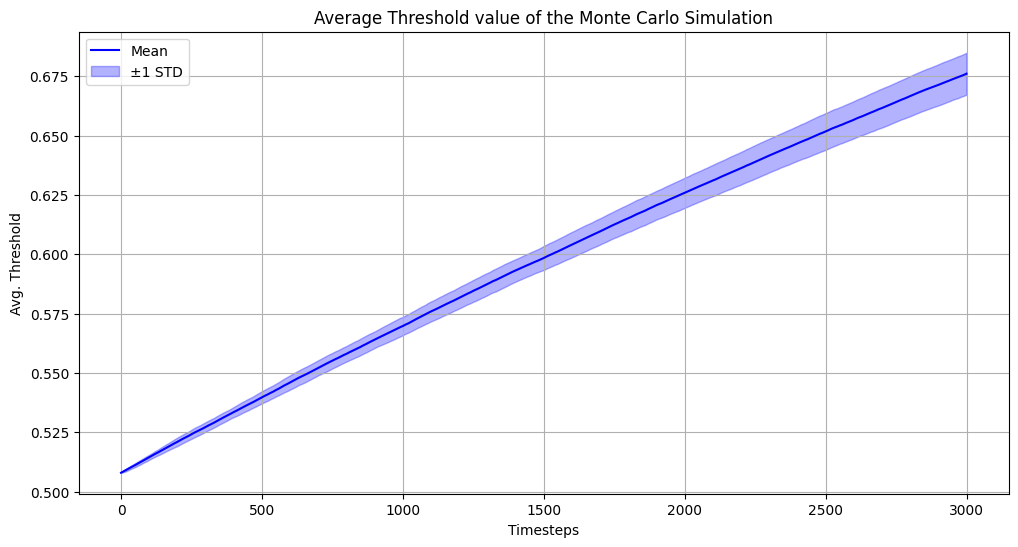

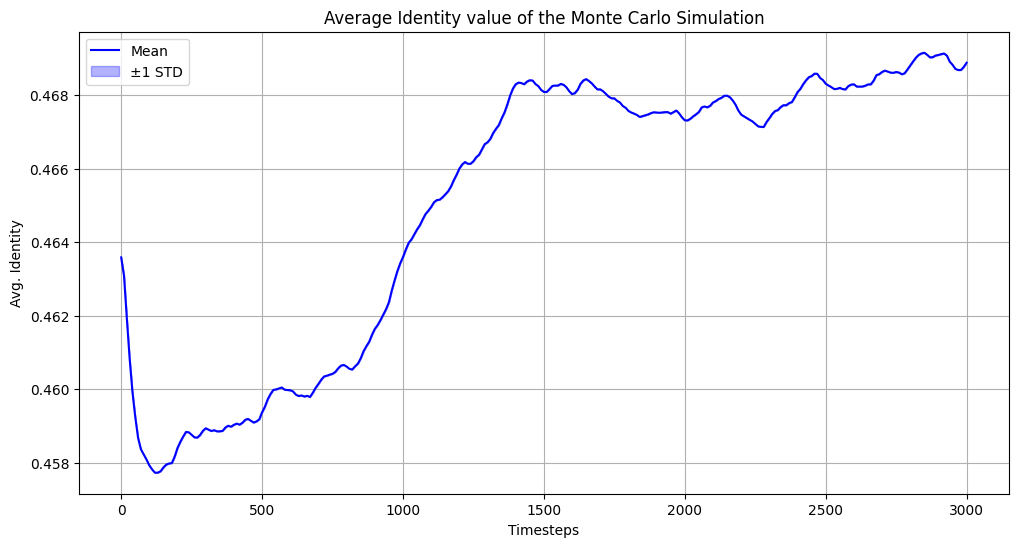

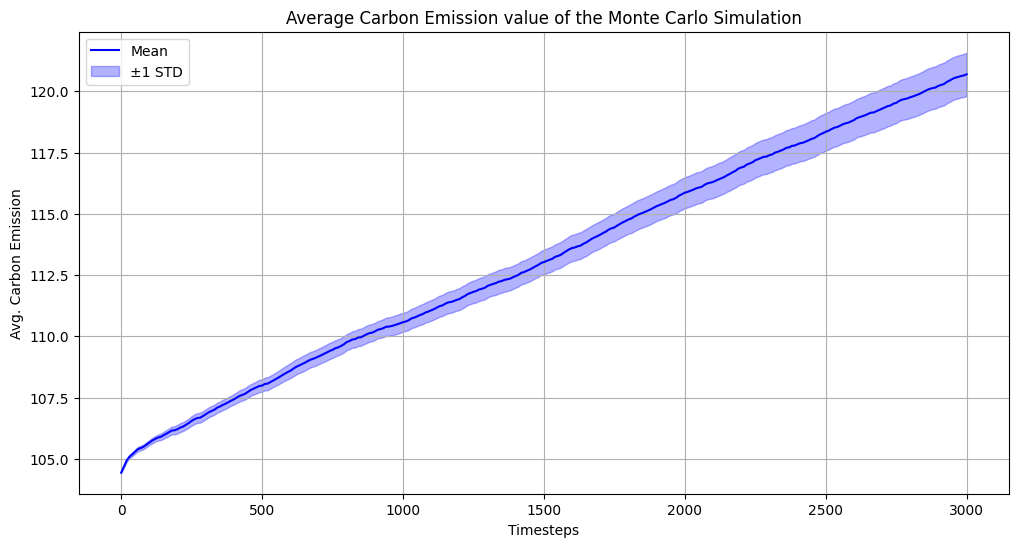

In [3]:
plt.figure(figsize=(12, 6))
for traj in all_threshold_trajectories:
    plt.plot(traj, alpha=0.8)
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels([int(t*10) for t in ticks])
plt.title("Monte Carlo Simulation of the Threshold Development")
plt.xlabel("Timesteps")
plt.ylabel("Average Thresholds")
plt.grid(True)

plt.figure(figsize=(12, 6))
for traj in all_identity_trajectories:
    plt.plot(traj, alpha=0.8)
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels([int(t*10) for t in ticks])
plt.title("Monte Carlo Simulation of the Environmental Identity Development")
plt.xlabel("Timesteps")
plt.ylabel("Average Identity")
plt.grid(True)

plt.figure(figsize=(12, 6))
for traj in all_carbon_trajectories:
    plt.plot(traj, alpha=0.8)
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels([int(t*10) for t in ticks])
plt.title("Monte Carlo Simulation of the Carbon Emission Development")
plt.xlabel("Timesteps")
plt.ylabel("Average Carbon Emission")
plt.grid(True)

data = np.array(all_threshold_trajectories)
mean_traj_threshold = data.mean(axis=0)
std_traj_threshold = data.std(axis=0)

plt.figure(figsize=(12, 6))
plt.plot(mean_traj_threshold, label="Mean", color='blue')
plt.fill_between(range(len(mean_traj_threshold)), mean_traj_threshold - std_traj_threshold, mean_traj_threshold + std_traj_threshold,
                 color='blue', alpha=0.3, label="±1 STD")
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels([int(t*10) for t in ticks])
plt.title("Average Threshold value of the Monte Carlo Simulation")
plt.xlabel("Timesteps")
plt.ylabel("Avg. Threshold")
plt.legend()
plt.grid(True)

data = np.array(all_identity_trajectories)
mean_traj_identity = data.mean(axis=0)
std_traj_identity = data.std(axis=0)

plt.figure(figsize=(12, 6))
plt.plot(mean_traj_identity, label="Mean", color='blue')
plt.fill_between(range(len(mean_traj_identity)), mean_traj_identity - std_traj_identity , mean_traj_identity + std_traj_identity,
                 color='blue', alpha=0.3, label="±1 STD")
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels([int(t*10) for t in ticks])
plt.title("Average Identity value of the Monte Carlo Simulation")
plt.xlabel("Timesteps")
plt.ylabel("Avg. Identity")
plt.legend()
plt.grid(True)

data = np.array(all_carbon_trajectories)
mean_traj_carbon = data.mean(axis=0)
std_traj_carbon = data.std(axis=0)

plt.figure(figsize=(12, 6))
plt.plot(mean_traj_carbon, label="Mean", color='blue')
plt.fill_between(range(len(mean_traj_carbon)), mean_traj_carbon - std_traj_carbon, mean_traj_carbon + std_traj_carbon,
                 color='blue', alpha=0.3, label="±1 STD")
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels([int(t*10) for t in ticks])
plt.title("Average Carbon Emission value of the Monte Carlo Simulation")
plt.xlabel("Timesteps")
plt.ylabel("Avg. Carbon Emission")
plt.legend()
plt.grid(True)

plt.show()